# Natural Langage Processing : Matrice de termes-documents

On voit dans ce notebook comment créer une matrice de termes à partir de notre corpus de termes, de manière à pouvoir faire tourner les modèles que l'on connaît par ailleurs sur des variables numériques. 

On charge les données nettoyées.

In [1]:
import pandas as pd
cr_df = pd.read_pickle('cr_df.pkl')

On va créer la matrice de termes, en indiquant au logiciel d'enlever les mots-balise comme "le", "et",... Ces mots n'apportent en effet pas grand chose à l'analyse en général.

Problème : la fonction propose automatiquement d'enlever les mots balise anglais mais pas les français. On va donc récupérer une liste dans un module python.

In [2]:
from stop_words import get_stop_words
french_stop_words = get_stop_words('french')
french_stop_words

['a',
 'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'alors',
 'as',
 'au',
 'aucun',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aussi',
 'autre',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avoir',
 'avons',
 'ayant',
 'ayez',
 'ayons',
 'bon',
 'car',
 'ce',
 'ceci',
 'cela',
 'ces',
 'cet',
 'cette',
 'ceux',
 'chaque',
 'ci',
 'comme',
 'comment',
 'd',
 'dans',
 'de',
 'dedans',
 'dehors',
 'depuis',
 'des',
 'deux',
 'devoir',
 'devrait',
 'devrez',
 'devriez',
 'devrions',
 'devrons',
 'devront',
 'dois',
 'doit',
 'donc',
 'dos',
 'droite',
 'du',
 'dès',
 'début',
 'dù',
 'elle',
 'elles',
 'en',
 'encore',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'faire',
 'fais',
 'faisez',
 'fait',
 'faites',
 'fois',
 'font',
 'force',
 'furent',

On peut maintenant utiliser `CountVectorizer` pour faire notre matrice de termes avec nos mots balise français : 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = french_stop_words)

# On fit_transform 
cr_cv = cv.fit_transform(cr_df.texte)
cr_dtm = pd.DataFrame(cr_cv.toarray(),
                      index = cr_df.index,
                      columns = cv.get_feature_names_out())
cr_dtm

,18,1992,2022,2024,25,accompagne,accorder,accordé,accrochage,acrobatique,...,édouard,égalisant,élimination,éliminée,éléphants,énorme,épargné,équatoriale,équipe,évident
CR hommes,2,1,1,0,0,0,1,1,1,0,...,2,0,0,1,1,1,1,1,1,1
CR femmes,0,0,0,1,1,1,0,1,0,1,...,0,1,2,0,0,0,0,0,2,0


On peut maintenant regarder quels sont les mots les plus utilisés pour chacun des compte-rendus : c'est aussi l'occasion de vérifier que notre nettoyage a bien été réalisé ou s'il nécessite quelques retouches.

In [4]:
# on transpose le df pour trier par mots les plus utilisés pour les hommes
cr_dtm = cr_dtm.transpose()
cr_dtm.sort_values(['CR hommes'], ascending = False).head(20)

,CR hommes,CR femmes
mané,6,0
var,5,0
fofana,4,0
sadio,4,0
penalty,4,0
finalement,4,0
plus,4,5
sangaré,3,0
atcho,3,0
contre,3,0


In [5]:
# pour les femmes
cr_dtm.sort_values(['CR femmes'], ascending = False).head(20)

,CR hommes,CR femmes
psg,0,6
plus,4,5
face,0,4
victoire,1,3
rencontres,0,3
buts,0,3
venait,0,2
bayern,0,2
élimination,0,2
ajax,0,2


Avec la librairie `wordcloud`, on peut faire une représentation graphique intéressante de ces résultats.

# Exercice : nuage de mots

Utilisez la fonction `WordCloud` pour faire un nuage de mots pour le compte-rendu de match femmes et un autre pour celui des hommes. Voyez-vous d'autres nettoyages de mots à faire?

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=french_stop_words,
               background_color="white", colormap="nipy_spectral",
               max_font_size=150, random_state=12,
               max_words=100)

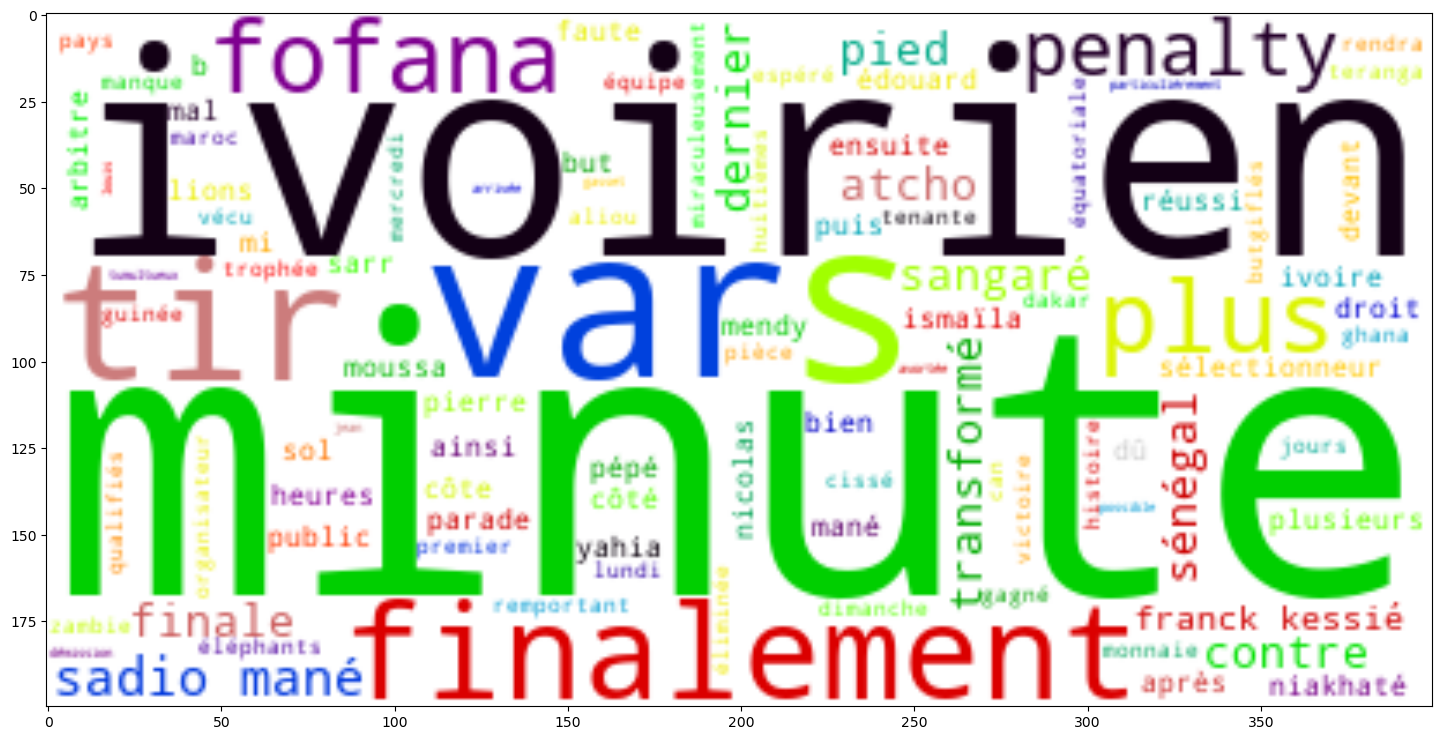

In [7]:
wc.generate(cr_df.texte["CR hommes"])

plt.figure(figsize=(18,9))
plt.imshow(wc, interpolation="bilinear");

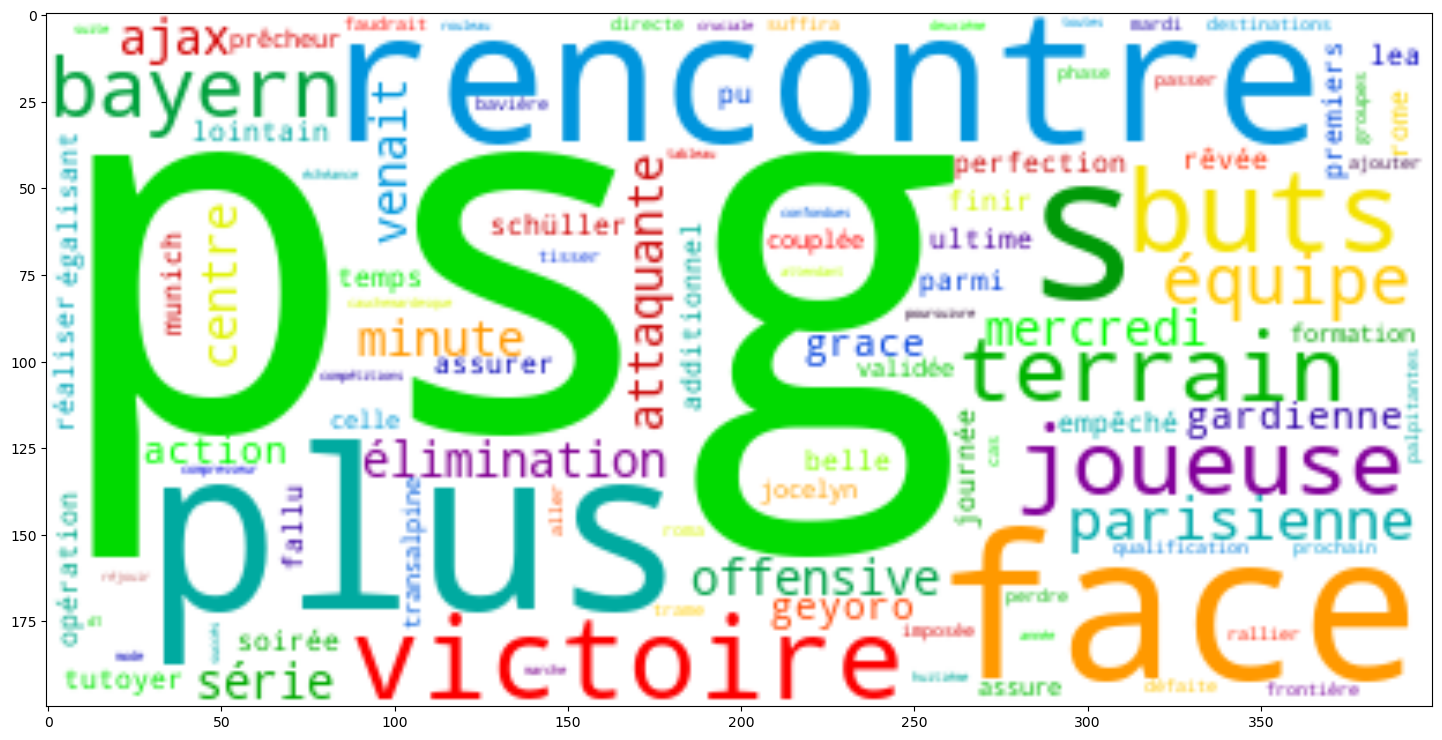

In [8]:
wc.generate(cr_df.texte["CR femmes"])

plt.figure(figsize=(18,9))
plt.imshow(wc, interpolation="bilinear");

In [9]:
import re
import string

# créons une fonction pour le preprocessing qu'on appliquera ensuite aux 2 textes du corpus
def re_nettoyage(text):
    text = text.lower()
    text = re.sub(r"van", "", text)
    text = re.sub(r"\b[sc]\b", "", text) # s ou c tout seul
    text = re.sub(r"coup franc", "coupfranc", text)
    text = re.sub(r"après", "", text)
    text = re.sub(r"megan rapinoe", "rapinoe", text)
    text = re.sub(r"alex morgan", "morgan", text)
    return text

cr_df['texte'] = cr_df.texte.apply(re_nettoyage)

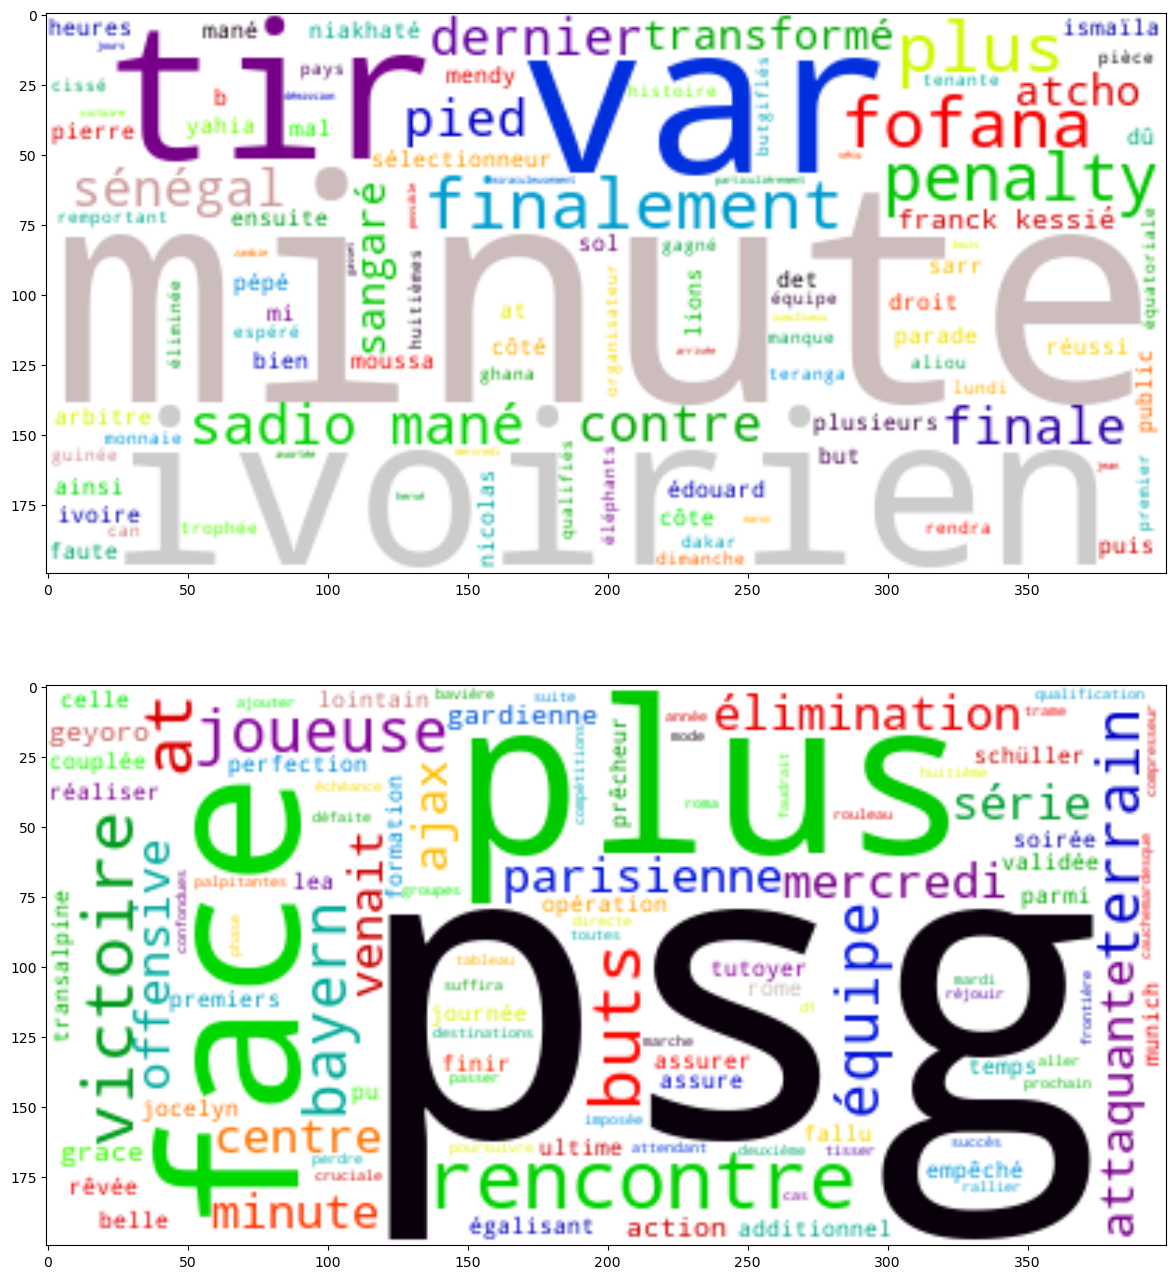

In [10]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,16))

wc.generate(cr_df.texte["CR hommes"])
ax1.imshow(wc, interpolation="bilinear")

wc.generate(cr_df.texte["CR femmes"])
ax2.imshow(wc, interpolation="bilinear");

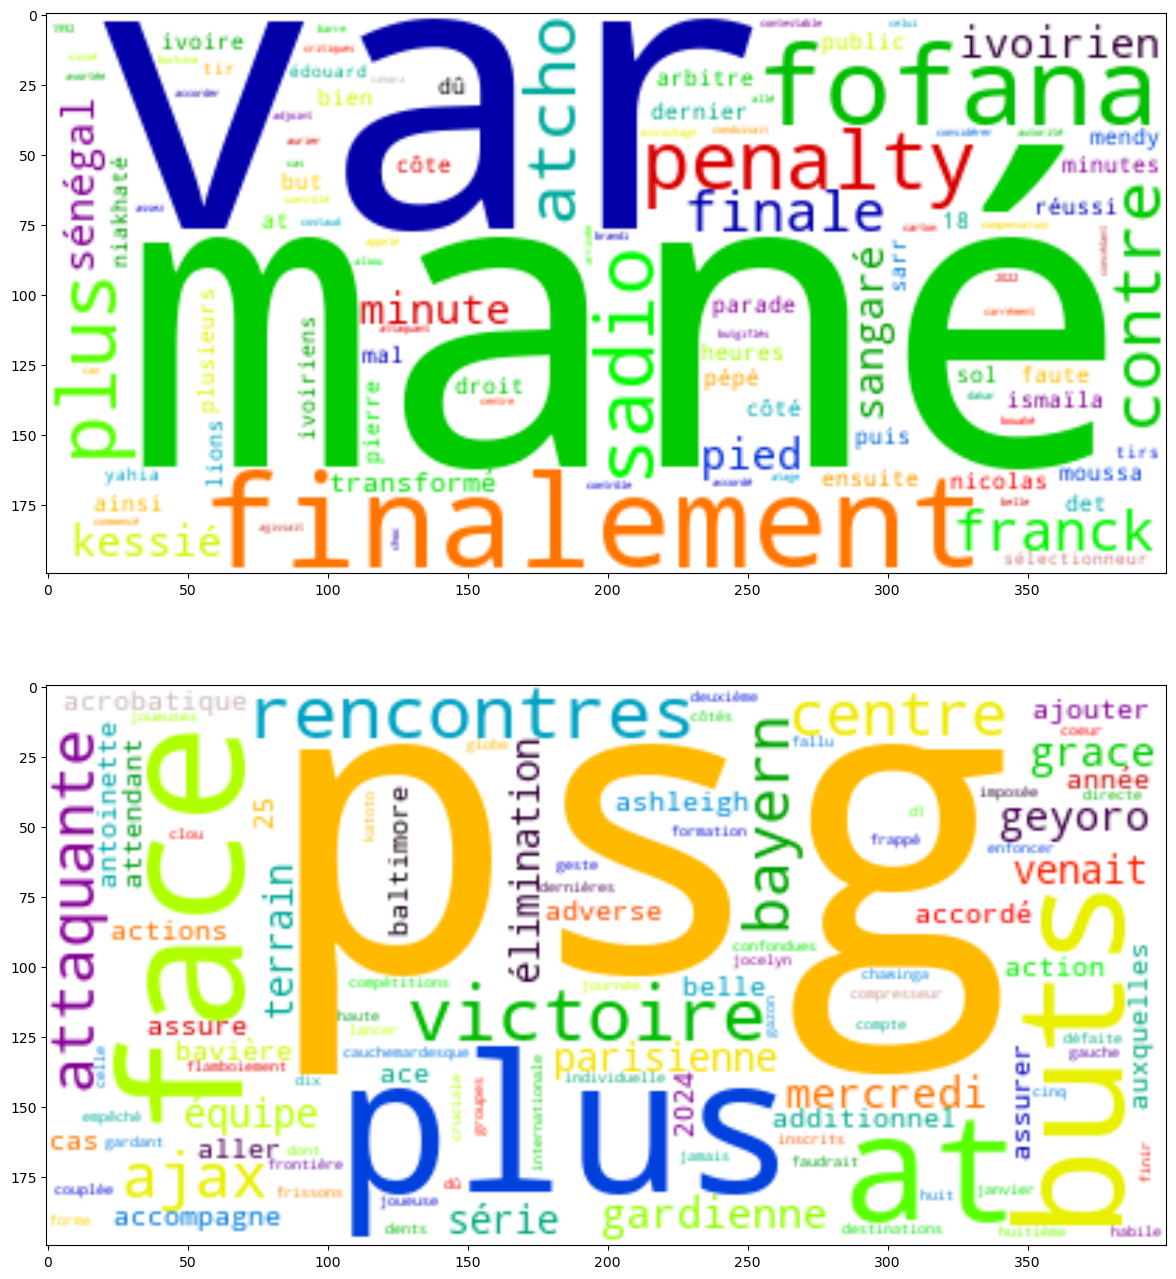

In [11]:
# possibilté de générer le wordcloud à partir de la matrice des termes
# on recrée la matrice des termes car des modifs supplémentaires ont été effectuées
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = french_stop_words)
cr_cv = cv.fit_transform(cr_df.texte)
cr_dtm = pd.DataFrame(cr_cv.toarray(),
                      index = cr_df.index,
                      columns = cv.get_feature_names_out())

# on affiche les wordcloud directement depuis la matrice de fréquences des termes
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,16))

wc.generate_from_frequencies(cr_dtm.loc['CR hommes'])
ax1.imshow(wc, interpolation="bilinear")

wc.generate_from_frequencies(cr_dtm.loc['CR femmes'])
ax2.imshow(wc, interpolation="bilinear");